***
BASADO EN https://github.com/Lawrence-Krukrubo/Machine_Learning
***


# Exploración de los datos

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc


Automatically created module for IPython interactive environment


Importemos su conjunto de datos  y creemos un dataframe en Pandas

In [3]:
data_link = 'diabetes (1).csv'

diabetes_df = pd.read_csv(data_link)

diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


Verifiquemos la forma y si existen valores faltantes.

In [4]:
diabetes_df.shape

(15000, 10)

In [5]:
diabetes_df.isna().any()

PatientID                 False
Pregnancies               False
PlasmaGlucose             False
DiastolicBloodPressure    False
TricepsThickness          False
SerumInsulin              False
BMI                       False
DiabetesPedigree          False
Age                       False
Diabetic                  False
dtype: bool

Veamos la distribución de cada columna, esto nos ayudaría a elegir el método de normalización de características más ideal.<br>
Primero, definamos un método que represente la distribución de cada característica.

In [6]:
def plot_features(data):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualizing The Features Distribution', y=0.95)

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    data.Age.plot(kind='hist', color='brown')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    data.Pregnancies.plot(kind='hist', color='brown')
    plt.xlabel('Pregnancies')
    plt.ylabel('Frequency')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    data.PlasmaGlucose.plot(kind='hist', color='brown')
    plt.xlabel('PlasmaGlucose')
    plt.ylabel('Frequency')

    plt.subplot(244)
    color_list = ['gold','purple','brown']
    data.DiastolicBloodPressure.plot(kind='hist', color='brown')
    plt.xlabel('DiastolicBP')
    plt.ylabel('Frequency')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    data.TricepsThickness.plot(kind='hist', color='brown')
    plt.xlabel('TricepsThickness')
    plt.ylabel('Frequency')

    plt.subplot(246)
    color_list = ['gold','purple','brown']
    data.SerumInsulin.plot(kind='hist', color='brown')
    plt.xlabel('SerumInsulin')
    plt.ylabel('Frequency')


    plt.subplot(247)
    color_list = ['gold','purple','brown']
    data.BMI.plot(kind='hist', color='brown')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')

    plt.subplot(248)
    color_list = ['gold','purple','brown']
    data.DiabetesPedigree.plot(kind='hist', color='brown')
    plt.xlabel('DiabetesPedigree')
    plt.ylabel('Frequency')

    plt.show()

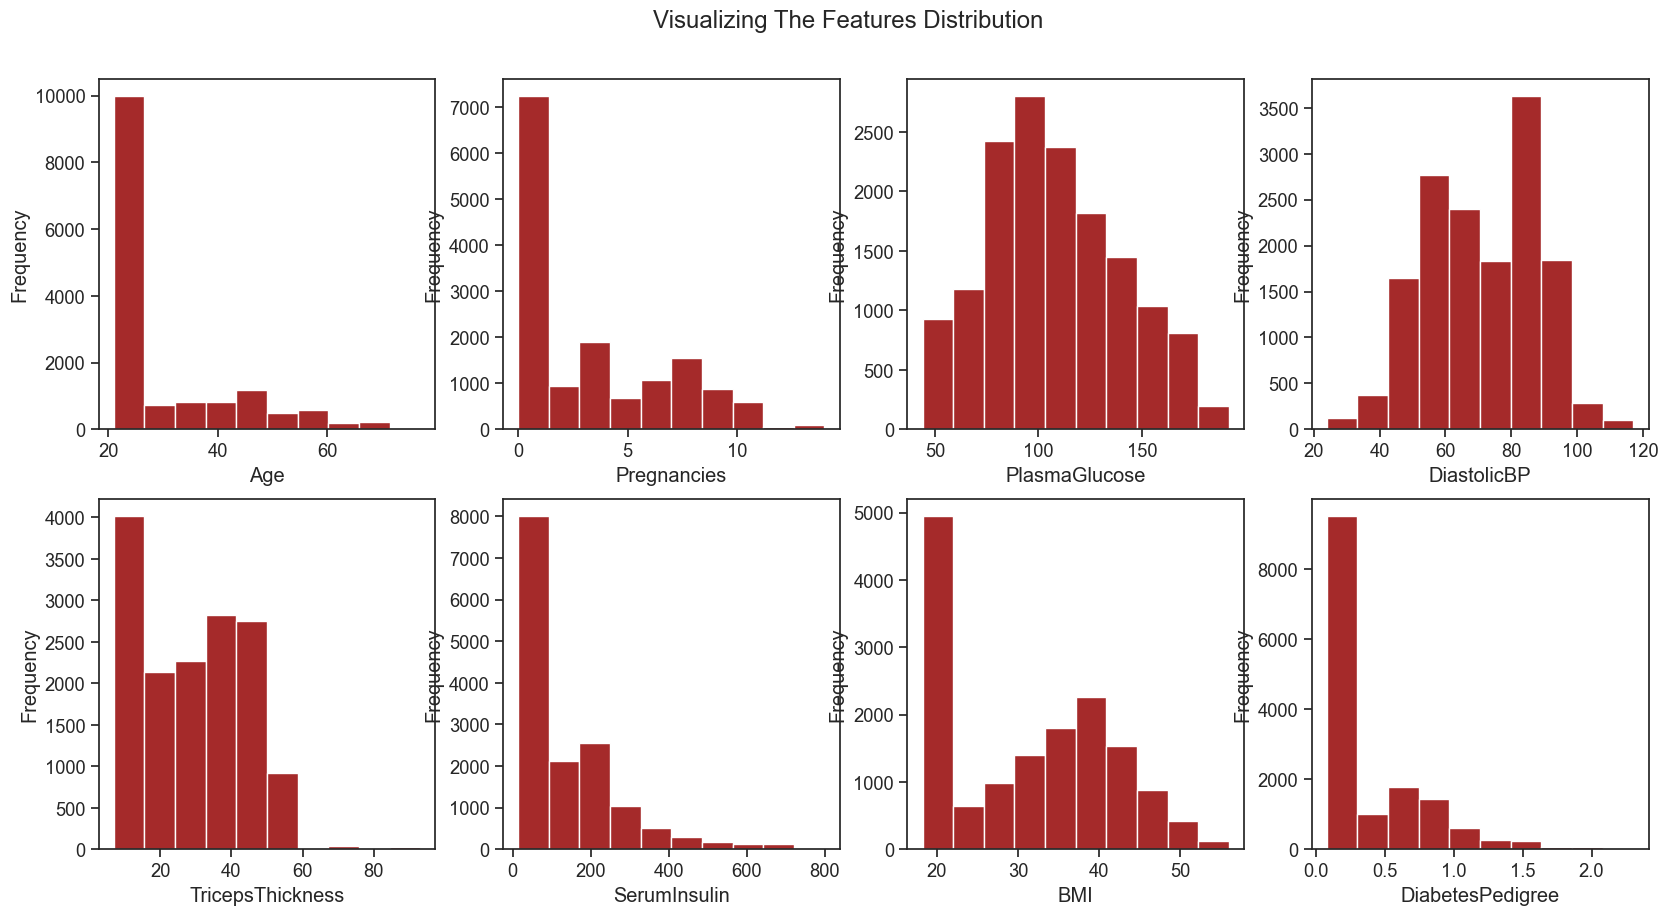

In [7]:
plot_features(diabetes_df)

Podemos ver que características como Edad, DiabetesPedigree, SerumInsulin e IMC parecen estar sesgadas hacia la derecha.<br>
Esto se debe a una gran cantidad de valores más pequeños y a una distribución progresiva de menos valores grandes.<br>
Mejoremos la distribución usando el registro de los valores, en lugar de los valores reales en estas características.<br>
Esta es una parte del proceso de ingeniería de características en Machine Learning

In [8]:
for i in diabetes_df.columns:
    if i in ['Age', 'DiabetesPedigree', 'BMI', 'SerumInsulin']:
        print(i)
        diabetes_df[i] = diabetes_df[i].apply(np.log)


SerumInsulin
BMI
DiabetesPedigree
Age


Veamos la distribución de nuevo.

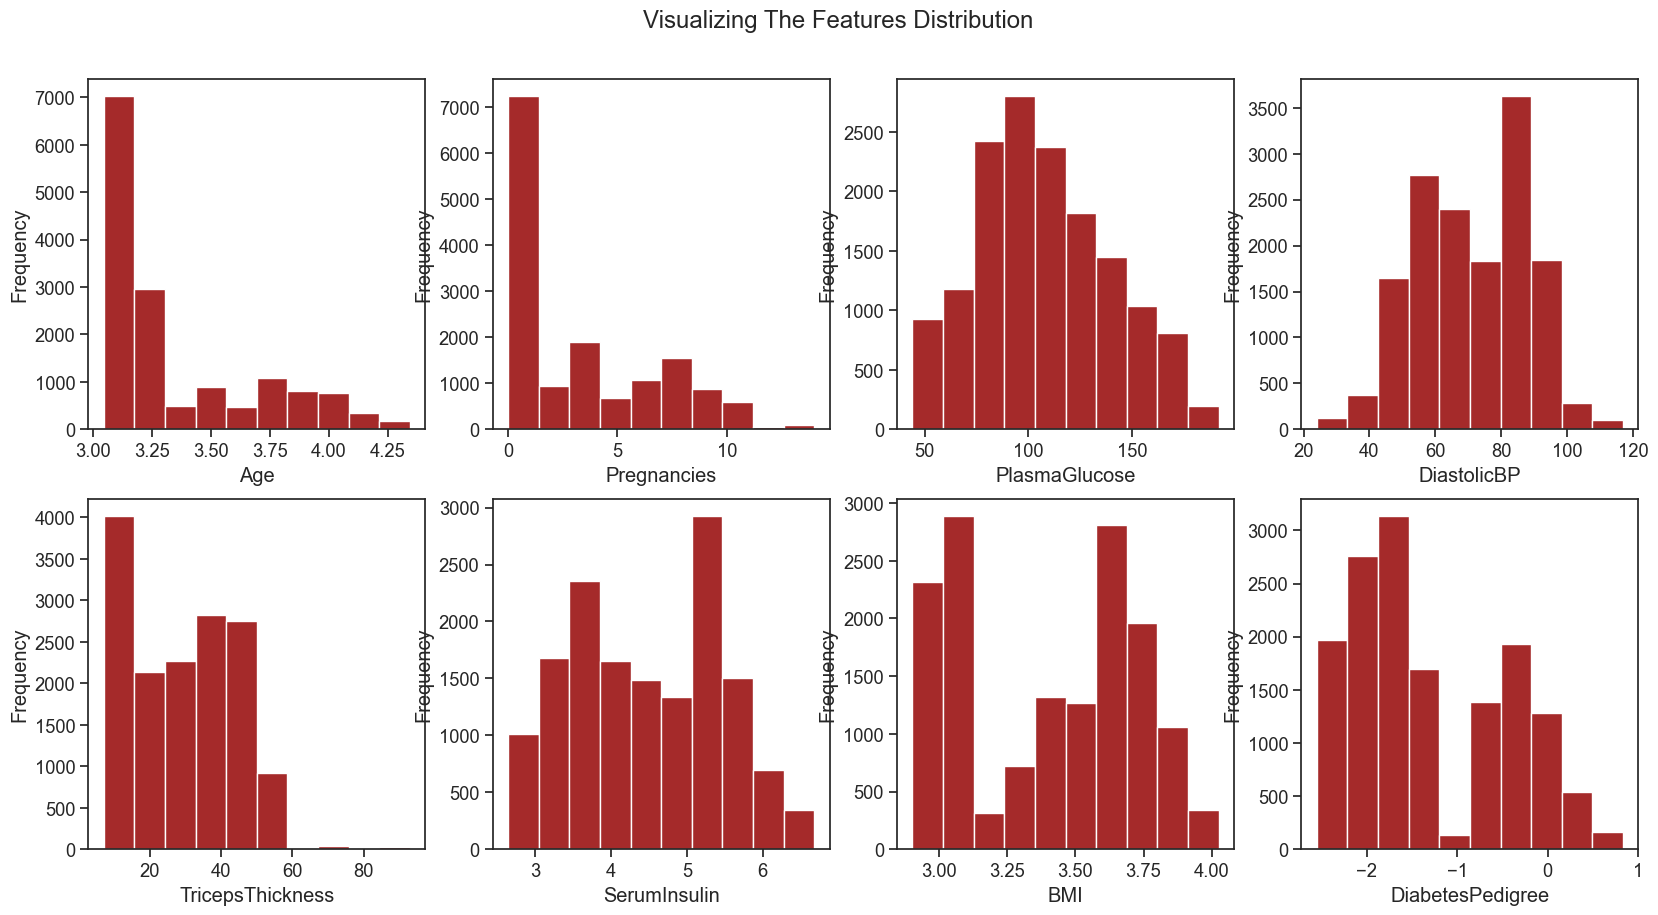

In [9]:
plot_features(diabetes_df)

De los gráficos anteriores, podemos ver una mejora en la distribución de nuestras características.<br>
Esto nos ayudaría a lograr un mejor resultado cuando entrenamos el modelo.

Bien, ahora veamos el conjunto de datos que contiene los nombres de los médicos que tratan a nuestros respectivos pacientes.
Lo cargamos en un dataframe.

In [10]:
doctors_link = 'doctors.csv'

doctors_df = pd.read_csv(doctors_link, encoding='latin-1')

doctors_df.head()



,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


In [11]:
doctors_df.shape

(14895, 2)

In [11]:
doctors_df.isna().sum()

PatientID    0
Physician    0
dtype: int64

Entonces podemos ver que los datos del Doctor son ligeramente más pequeños que el conjunto de datos de los pacientes.<br>
Esto puede deberse al hecho de que algunos médicos vieron a más de un paciente.<br>

-------------------
Unamos a la izquierda los marcos de datos diabetes_df y doctors_df usando el ID del paciente como clave de unión.<br>
La unión a la izquierda aquí es importante para que mantengamos los datos de los pacientes que pueden no tener nombres de médicos también.

In [12]:
diabetes_doctor_df = pd.merge(diabetes_df, doctors_df, how='left', on='PatientID' )

diabetes_doctor_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,3.135494,3.772984,0.193254,3.044522,0,Dan Drayton
1,1147438,8,92,93,47,3.583519,3.055913,-1.842853,3.135494,0,Anthony Frizzell
2,1640031,7,115,47,52,3.555348,3.725971,-2.538072,3.135494,0,Gordon Fredrickson
3,1883350,9,103,78,25,5.717028,3.387173,0.249100,3.761200,1,Chad Corbitt
4,1424119,1,85,59,27,3.555348,3.751961,-0.598670,3.091042,0,Zachary Fellows


Ahora podemos ver la columna de médicos adjunta y podemos decir qué médico trató a un paciente.<br>
Veamos la forma y también verifiquemos el número y las columnas con valores nulos

In [13]:
diabetes_doctor_df.shape

(15000, 11)

In [15]:
diabetes_doctor_df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
Physician                 0
dtype: int64

No hay valores faltantes, la razón podría ser que algunos médicos trataron a varios pacientes.

Verifiquemos la cantidad de médicos únicos en la lista de médicos

In [14]:
diabetes_doctor_df.Physician.nunique()

# We can see that there are 109 doctors who treated these 15000 patients

109

Verifiquemos también la cantidad de pacientes únicos en el conjunto de datos

In [15]:
diabetes_doctor_df.PatientID.nunique()

14895

Ahora tiene sentido,<br>
Hay 14895 pacientes únicos y los registros médicos tienen entradas para exactamente 14895 pacientes.<br>
El hecho de que el conjunto de datos de los pacientes tenga 15000 entradas se debe simplemente a que algunos pacientes tenían varias entradas.<br>
Dado que fusionamos los médicos y los pacientes en la columna de ID de paciente, la fusión asigna correctamente a cada médico a los pacientes que trató, aunque solo tenemos 109 médicos únicos.

In [16]:
diabetes_doctor_df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
Physician                 0
dtype: int64

### Preparación de datos

Como suele ser el caso con el aprendizaje automático de cualquier tipo, se requiere cierta preparación de datos antes de poder
use los datos para entrenar un modelo.<br>
Normalizaremos las características para que las características que tienen valores grandes no dominen el entrenamiento.<br>
Al observar las formas de la distribución de cada característica, aquellas con una forma de campana de distribución más o menos normal se normalizarán mediante el método Zscore.<br>
Mientras que aquellos con valores grandes y bajos variables se normalizarán utilizando el método Min-Max.

**1. Z-Score or Standard Score**_  
  

$Xnew =$ $Xold - mean \over STD(sigma)$

_**2. Min-Max Method**_  


$Xnew =$ $Xold - Xmin \over Xmax - Xmin$

Ahora apliquemos estos métodos a las columnas seleccionadas usando el método de aplicación.

In [17]:
for i in diabetes_doctor_df.columns[:-2]:
    mean = diabetes_doctor_df[i].mean()
    std = diabetes_doctor_df[i].std()
    mini = diabetes_doctor_df[i].min()
    maxi = diabetes_doctor_df[i].max()

    # if columns are not Age or Pregnancies, apply the Z_score norm method
    if i not in ['Age', 'Pregnancies']:
        diabetes_doctor_df[i] = diabetes_doctor_df[i].apply(lambda x: (x - mean) / std)

    # Else if columns are either Age or Pregnancies, then apply the Min-Max norm method
    else:
        diabetes_doctor_df[i] = diabetes_doctor_df[i].apply(lambda x: (x - mini) / (maxi - mini))


In [18]:
diabetes_doctor_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,-0.512160,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0,Dan Drayton
1,-1.228971,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0,Anthony Frizzell
2,0.474010,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0,Gordon Fredrickson
3,1.315206,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1,Chad Corbitt
4,-0.272436,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0,Zachary Fellows


Ahora que hemos preparado el conjunto de datos, lo usaremos para entrenar y evaluar una máquina clasificadora.
modelo de aprendizaje Por lo general, cuando se entrena un modelo de aprendizaje supervisado, en el que los datos de entrenamiento incluyen
valores de etiqueta conocidos, dividimos los datos en un conjunto de entrenamiento con el que entrenar el modelo y un conjunto de prueba
con el que validar las predicciones generadas por el modelo entrenado.

Antes de continuar, verifiquemos la cantidad de observaciones que tiene cada clase de diabéticos o no diabéticos<br>

In [19]:
diabetes_doctor_df.Diabetic.value_counts()

Diabetic
0    10000
1     5000
Name: count, dtype: int64

Visualizemos la distribución

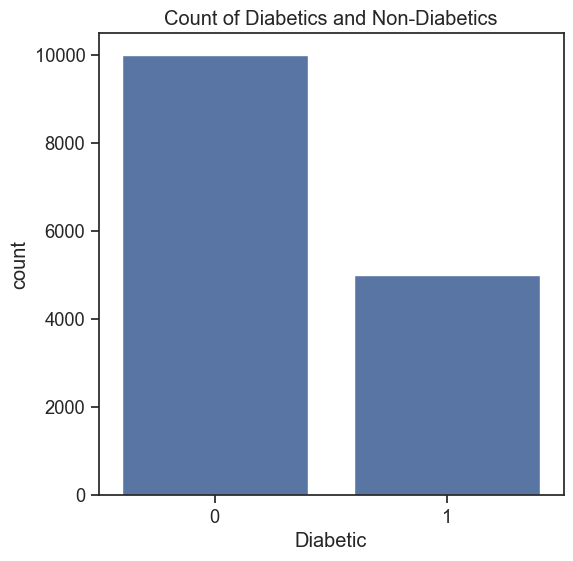

In [20]:
plt.figure(figsize=(6, 6))

sns.countplot(x=diabetes_doctor_df["Diabetic"])
plt.title('Count of Diabetics and Non-Diabetics')
plt.show()

Podemos ver que de las 15 000 observaciones en nuestro conjunto de datos, la clase No diabético tiene 10 000 entradas, mientras que la clase Diabético tiene solo 5000 entradas.<br>
Este es un conjunto de datos desequilibrado y el riesgo que implica es que nuestro modelo puede aprender las características de una clase más que la otra.<br>
Necesitamos encontrar una manera de equilibrar el conjunto de datos para una clasificación más imparcial y confiable.

Antes de hacer la división, seleccionemos solo las columnas que importan anulando las columnas ID del paciente y Médico.

In [21]:
feature_matrix = diabetes_doctor_df.iloc[:,1:-2]
feature_matrix.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000
1,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017
2,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017
3,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595
4,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804


definamos también nuestra variable de etiqueta

In [22]:
label = diabetes_doctor_df.Diabetic

label.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

In [23]:
feature_matrix.shape

(15000, 8)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, label, test_size=0.3, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (10500, 8)
X_test shape is (4500, 8)
y_train shape is (10500,)
y_test shape is (4500,)


Creamos Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

Definimos una función para imprimir la Confusion-Matrix

In [26]:
from sklearn.metrics import classification_report


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Definamos una función que grafique la curva ROC

In [27]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

Definamos una función que devuelva el mejor modelo clasificador de árbol de decisión y genere sus parámetros y un gráfico de la matriz de confusión.

In [29]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters


def best_decision_tree_classifier(X_train, X_test, y_train, y_test):
    max_depth = 100
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}

    for i in range(1, max_depth+1):
            # Let's instantiate a model
            decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)

            # Let's train the model
            decision_model.fit(X_train, y_train)

            # Let's make prediction on the test data
            y_hat = decision_model.predict(X_test)

            # Let's measure accuracy of predictions on test data
            val_accu = round(metrics.accuracy_score(y_test, y_hat),4)

            # Let's Measure the F1 Score
            val_f1 = round(f1_score(y_test, y_hat, average='weighted'),4)

            # Let's Measure Logloss
            logloss = round(log_loss(y_test, y_hat, normalize=True),4)

            if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
                accuracy_dict['max_depth'] = i
                accuracy_dict['val_acc'] = val_accu
                accuracy_dict['f1_Score'] = val_f1
                accuracy_dict['log_loss'] = logloss
                decision_model = decision_model

            # Compute confusion matrix
            Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
            np.set_printoptions(precision=2)

            TP = Dtrees_cnf_matrix[0,0]
            FP = Dtrees_cnf_matrix[0,1]
            FN = Dtrees_cnf_matrix[1,0]
            TN = Dtrees_cnf_matrix[1,1]

            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            precision = TP / (TP + FP)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,
                          title='Confusion Matrix for Decision-Tree-Classifier')
    plt.show()
    print()

    print('TP is:',TP,'FP is:',FP,'TN is:',TN,'FN is:',FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(decision_model)
    print()
    print('accuracy is:',round(accuracy,2))
    print('recall is:',round(recall,2))
    print('precision is:',round(precision,2))
    print()

    return decision_model

Confusion matrix, without normalization
[[1329  213]
 [ 237 2721]]


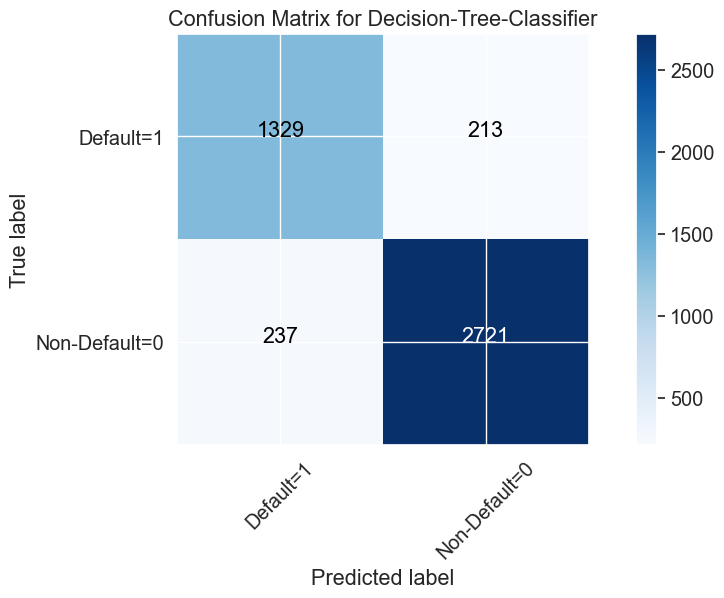


TP is: 1329 FP is: 213 TN is: 2721 FN is: 237

Model Evaluation:
{'max_depth': 8, 'val_acc': 0.9089, 'f1_Score': np.float64(0.9092), 'log_loss': 3.284}



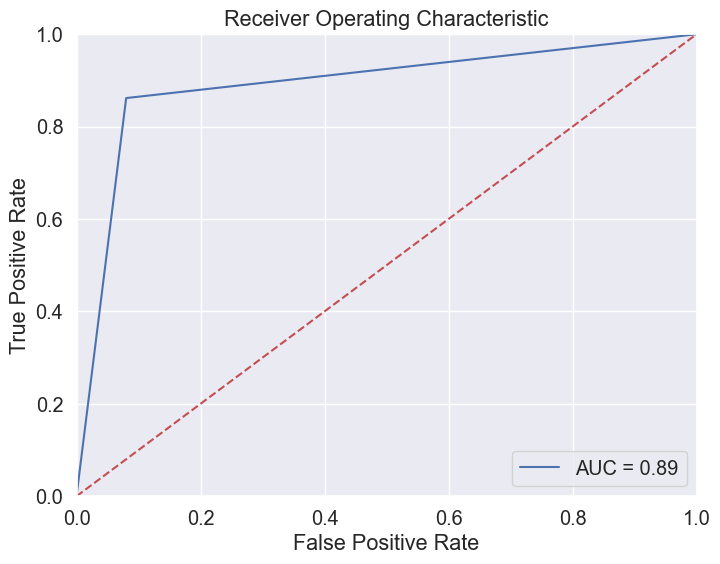


accuracy is: 0.9
recall is: 0.85
precision is: 0.86



DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [30]:
decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
decision_tree_classifier

## Consideraciones

Tenga en cuenta lo siguiente sobre estas métricas:<br>
• La Matriz de Confusión muestra el número de Verdaderos Positivos y Verdaderos Negativos (casos
correctamente clasificados) y Falsos Negativos y Falsos Positivos (casos incorrectamente clasificados).<br>

• Accuracy es la fracción de casos clasificados correctamente.<br>
• Recall, es la fracción de casos positivos clasificados correctamente del total de casos positivos en el conjunto de datos. <br>
• Precision es la fracción de casos positivos clasificados correctamente de todos los casos clasificados como positivos.

Equilibremos el conjunto de datos y entrenemos un nuevo modelo

Necesitamos equilibrar el conjunto de datos porque en un conjunto de datos desequilibrado, la precisión no es una métrica confiable para el rendimiento real de un clasificador, ya que arrojará resultados engañosos (es decir, cuando el número de observaciones en diferentes clases varía mucho).< br>
Por ejemplo, 70% de no morosos y 30% de morosos, un clasificador particular podría clasificar todas o la mayoría de las observaciones como No morosos.<br>
Esto se debe a que el clasificador o modelo tiene una alta tasa de reconocimiento (sensibilidad) para la clase dominante.<br>
[Puntuación F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) también sería incluso menos fiable en un conjunto de datos desequilibrado.

**SMOTE - Synthetic Minority Over-sampling Technique** [link](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)

***
EJERCICIO: busque los mejores parámetros para la llamada a SMOTE
***

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)

In [32]:
over_sampled_features, over_sampled_label = sm.fit_resample(feature_matrix, label)

In [33]:
print('Shape of resampled feature set is:',over_sampled_features.shape)
print('Shape of resampled target data is:',over_sampled_label.shape)

Shape of resampled feature set is: (20000, 8)
Shape of resampled target data is: (20000,)


Concatenemos las características y el objetivo de nuevo en un dataframe

In [34]:
over_sampled_df = pd.DataFrame(over_sampled_features, columns=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age'])

over_sampled_df['Diabetic'] = over_sampled_label

over_sampled_df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0
1,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0
2,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0
3,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1
4,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0


In [35]:
over_sampled_df.shape

(20000, 9)

Visualizamos la nueva distribución

***
EJERCICIO : grafique la nueva distribucion de las clases
***

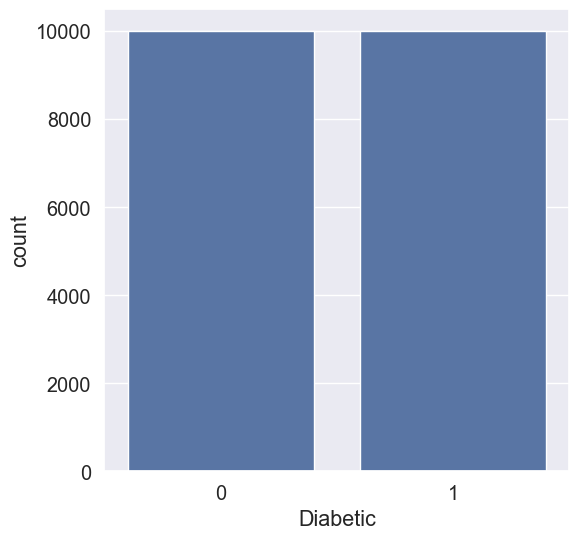

In [36]:
plt.figure(figsize=(6, 6))

# COLOQUE SUS CODIGO AQUI...
#
sns.countplot(x=over_sampled_df["Diabetic"])
plt.show()

Bien, lo anterior es un conjunto de datos bien equilibrado. pasemos a entrenar el modelo dividiendo primero el conjunto de datos

In [37]:
X_train, X_test, y_train, y_test = train_test_split(over_sampled_df.iloc[:,:-1], over_sampled_df.Diabetic, test_size=0.3, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (14000, 8)
X_test shape is (6000, 8)
y_train shape is (14000,)
y_test shape is (6000,)


Llamemos a DecisionTreeFunction para construir, clasificar y evaluar la predicción de nuestro modelo.

Confusion matrix, without normalization
[[2768  250]
 [ 229 2753]]


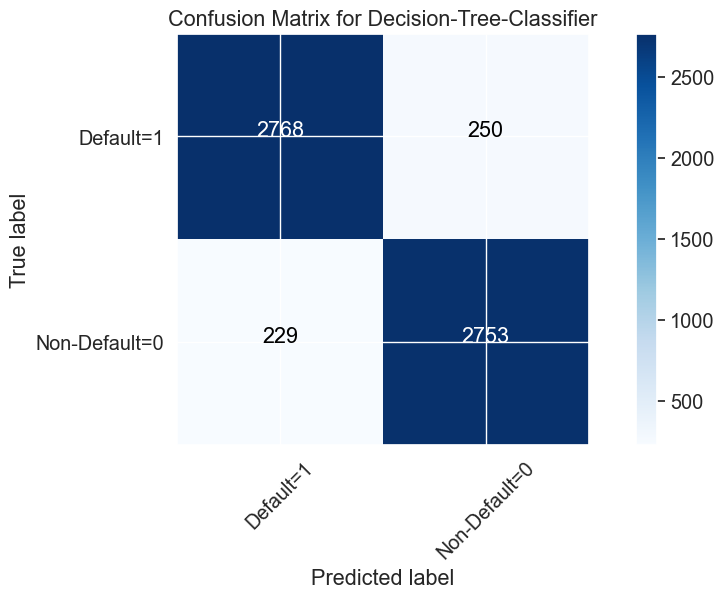


TP is: 2768 FP is: 250 TN is: 2753 FN is: 229

Model Evaluation:
{'max_depth': 10, 'val_acc': 0.9257, 'f1_Score': np.float64(0.9257), 'log_loss': 2.6792}



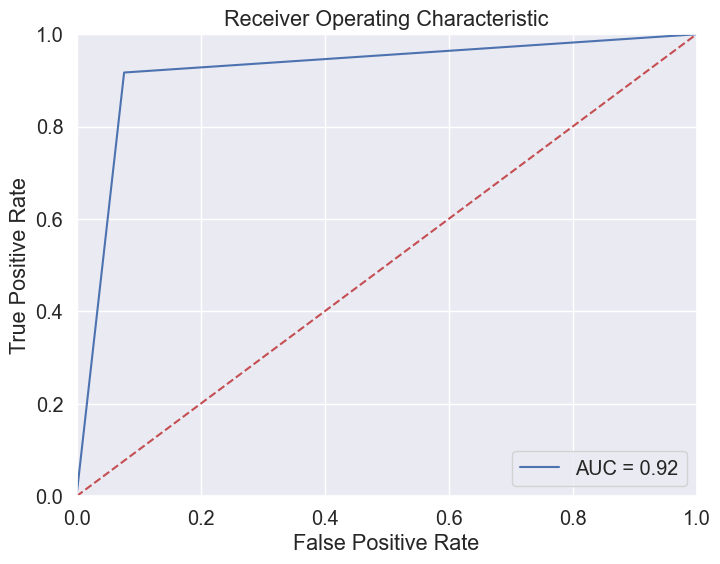


accuracy is: 0.92
recall is: 0.92
precision is: 0.92



DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [38]:
decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
decision_tree_classifier

***
# CONCLUSIÓN
Podemos ver claramente un aumento en el rendimiento del modelo simplemente equilibrando el conjunto de datos.<br>
El modelo generaliza mejor y es más preciso y seguro en sus tareas de clasificación.

Tarea

In [39]:

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score


# Equilibrio de datos con SMOTE
sm = SMOTE(random_state=42)
over_sampled_features, over_sampled_label = sm.fit_resample(feature_matrix, label)

# Dividir los datos balanceados
X_train, X_test, y_train, y_test = train_test_split(over_sampled_features, over_sampled_label, test_size=0.3, random_state=1234)

SVM

SVM Accuracy: 0.7926666666666666
SVM F1-Score: 0.7974601107131227


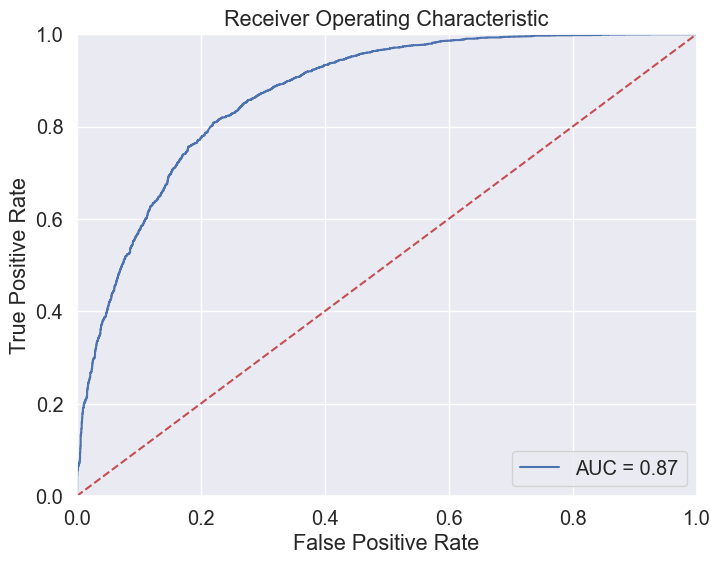

array([[0.15, 0.85],
       [0.11, 0.89],
       [0.96, 0.04],
       ...,
       [0.81, 0.19],
       [0.97, 0.03],
       [0.02, 0.98]])

In [42]:
svm_model = SVC(kernel='linear', probability=True) 
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-Score:", svm_f1)
plot_roc_chart(svm_model)


Naive Bayes

Naive Bayes Accuracy: 0.8135
Naive Bayes F1-Score: 0.8137173297819211


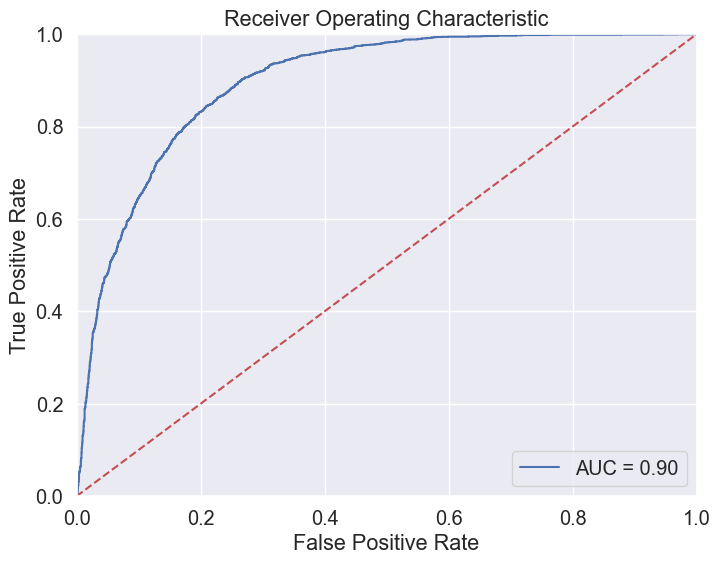

array([[0.1 , 0.9 ],
       [0.11, 0.89],
       [0.96, 0.04],
       ...,
       [0.77, 0.23],
       [0.99, 0.01],
       [0.02, 0.98]])

In [44]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-Score:", nb_f1)
plot_roc_chart(nb_model)

Se aprecia que Naive Bayes tiene mayor precision.